# Obliczanie wartości wielomianu interpolacyjnego metodą Lagrange'a

Interpolacja to proces szacowania wartości funkcji w punktach pośrednich na podstawie znanych wartości tej funkcji w
innych punktach. W tym procesie szuka się funkcji, która najlepiej "wpasuje" się w zadane punkty i umożliwi szacowanie wartości funkcji w dowolnym miejscu. Najczęściej stosowaną metodą interpolacji jest interpolacja wielomianowa, polegająca na znalezieniu wielomianu, który przechodzi przez zadane punkty. Interpolacja jest stosowana w wielu dziedzinach, m.in. w matematyce, fizyce, ekonomii czy inżynierii, do analizy danych, aproksymacji funkcji i modelowania zjawisk. Metoda Lagrange'a jest jedną z popularnych metod numerycznych służących do interpolacji funkcji za pomocą wielomianu.

## Wstęp - Kroki obliczeń

Ogólna postać wielomianu interpolacyjnego Lagrange'a wygląda następująco:

![Wzor ogolny](assets/1.png)

Dla 4 punktów wzór interpolacyjny Lagrange'a wygląda następująco:

![Wzor dla 4 punktow](assets/2.png)

Moje podejście do rozwiązania problemu polegało na podzieleniu całego problemu na mniejsze kroki, które są łatwiejsze
do zrozumienia i wykonania. Uzyskane wyniki poszczególnych kroków następnie przechowujemy w tablicach, by później
 wykonać na nich odpowiednie operacje. Ułatwia to zrozumienie procesu oraz umożliwia jego prostą implementację w dowolnym języku programowania.

Poszczególne kroki obliczeń można przedstawić w następujący sposób (tu dla 4 punktów):

### 1. Obliczanie liczników wszystkich wielomianów interpolacyjnych oraz zapisanie ich w tablicy

W każdym liczniku znajdują się różnice między wartością x a wartościami xᵢ poza wartością o aktualnym indeksie i.
Wobec tego wartość licznika możemy obliczyć poprzez iterację po wszystkich wartościach xᵢ i wykluczenie z nich
wartości xᵢ aktualnym indeksie. Następnie obliczamy iloczyn (ang. product) wszystkich wartości, które pozostały po
wykluczeniu xᵢ wartości o aktualnym indeksie. By uniknąc koniecznoścci iteracji po wszystkich elementach, możemy
zastosować wbudowaną w bibliotekę `numPy` funkcję `numpy.prod`, która zwróci automatycznie iloczyn elementów tablicy na
danej osi. Wynik zapisujemy w tablicy liczniki.

![Obliczanie licznikow](assets/3.png)

### 2. Obliczanie mianowników wszystkich wielomianów interpolacyjnych oraz zapisanie ich w tablicy

W każdym mianowniku znajdują się różnice między wartością xᵢ o aktualnym indeksie a wartościami xᵢ poza wartością o
aktualnym indeksie i.
Wobec tego wartość mianownika możemy obliczyć poprzez iterację po wszystkich wartościach xᵢ i wykluczenie z nich
wartości xᵢ aktualnym indeksie. Następnie obliczamy iloczyn (ang. product) wszystkich wartości, które pozostały po
wykluczeniu xᵢ wartości o aktualnym indeksie. By uniknąć koniecznoścci iteracji po wszystkich elementach, możemy
zastosować wbudowaną w bibliotekę `numPy` funkcję `numpy.prod`, która zwróci automatycznie iloczyn elementów tablicy na
danej osi. Wynik zapisujemy w tablicy mianowniki.
![Obliczanie mianownikow](assets/4.png)

### 3. Podzielenie liczników przez mianowniki

Kolejnym krokiem jest obliczenie wyników dzielenia liczników przez mianowniki. Rozwiązujemy to poprzez iterację po
ilości elementów równych ilości liczników i mianowników i dzieleniu każdego elementu jednej tablicy (licznika) przez
każdy element drugiej tablicy (mianownika). By uniknąć koniecznoścci iteracji po wszystkich elementach, możemy
zastosować wbudowaną w bibliotekę `numPy` funkcję `divide`, która zwróci automatycznie wynik dzielenia elementów
tablicy `liczniki` przez elementy tablicy `mianowniki`.
Wyniki zapisujemy w tablicy wyniki.

![Podzielenie licznikow przez mianowniki](assets/5.png)

### 4. Pomnożenie wyników z kroku 3 przez wartości funkcji w węzłach interpolacji

Wyniki dzielenia następnie mnożymy przez wartości funkcji w węzłach interpolacji. Ułatwia to biblioteka numpy, dzięki
 wbudowanej funkcjonalności pozwalającej na mnożenie tablic przez skalar lub tablicę. W tym przypadku unikamy
 stosowania pętli for, dzięki czemu kod jest bardziej czytelny i łatwiejszy do zrozumienia.

![Pomnozenie wynikow z kroku 3 przez wartosci funkcji w wezlach interpolacji](assets/6.png)

### 5. Sumowanie wszystkich wyników z kroku 4

W kolejnym kroku sumujemy wszystkie wyniki z kroku 4. W tym celu wykorzystujemy wbudowaną w bibliotekę `numPy` funkcję
 `numpy.sum`, która zwróci automatycznie sumę elementów tablicy na danej osi.

![Sumowanie wszystkich wynikow z kroku 4](assets/7.png)

### 6. Wyświetlenie wyniku

Wartość wielomianu interpolacyjnego w punkcie x wynosi sumę z kroku 5
<br>
<br>






## Przykład implementacji metody kroków dla 4 punktów interpolacji w języku Python

### Import bibliotek

In [141]:
import numpy as np
import pandas as pd

### Lista zawierająca punkty pomiarowe stanowiące podstawę obliczeń

In [142]:
pts = np.array([[1,3], [2,1], [3, -1], [4, 2]])
# Transpozycja tablicy, aby punkty były w kolumnach
pts = np.transpose(pts)
# Stworzenie DataFrame z punktami w celu wyświetlenia ich w postaci tabeli
pts_dataframe = pd.DataFrame(pts, columns = np.arange(len(pts[0])), index = ['xᵢ', 'yᵢ'])
print(pts_dataframe)
# Przypisanie wartości z listy do zmiennych w celu łatwiejszego ich wykorzystania
xi = pts[0]
yi = pts[1]

    0  1  2  3
xᵢ  1  2  3  4
yᵢ  3  1 -1  2


### Punkt w którym będziemy szukać wartości wielomianu interpolacyjnego

In [143]:
x = 4.25

### Krok 1 - Obliczanie liczników wszystkich wielomianów i zapisanie ich do tablicy o nazwie liczniki

In [144]:
# Tablica na wyniki
liczniki = np.array([])
# Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
for xindex, xx in enumerate(xi):
    # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
    mask = np.arange(len(xi)) != xindex
    # Używamy maski do wybrania wszystkich elementów poza tym o podanym indeksie
    elements_except_current = xi[mask]
    # Obliczamy licznik - jest to iloczyn wyników odejmowania od wartości x wszystkich innych wartości xi poza tym o
    # podanym indeksie
    top = np.prod(x - elements_except_current)
    # Dodajemy licznik do tablicy wyników
    liczniki = np.append(liczniki, top)

print('Tablica z licznikami: ', liczniki)

Tablica z licznikami:  [0.703125 1.015625 1.828125 9.140625]


### Krok 2 - Obliczanie mianowników wszystkich wielomianów i zapisanie ich do tablicy o nazwie mianowniki

In [145]:
# Tablica na wyniki
mianowniki = np.array([])
# Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
for xindex, xx in enumerate(xi):
   # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
   x_other_than_curr = xi[np.arange(len(xi)) != xindex]
   # Obliczamy mianownik - jest to iloczyn wyników odejmowania aktualnej wartości xi od wszystkich innych wartości xi
   bottom = np.prod(xx - xi[np.arange(len(xi)) != xindex])
    # Dodajemy mianownik do tablicy wyników
   mianowniki = np.append(mianowniki, bottom)

print('Tablica z mianownikami: ', mianowniki)

Tablica z mianownikami:  [-6.  2. -2.  6.]


### Krok 3 - Podzielenie liczników przez mianowniki

In [146]:
# Obliczamy wynik dzielenia liczników przez mianowniki
wyniki_dzielenia = np.divide(liczniki, mianowniki)
print('Wyniki dzielenia licznikow przez mianowniki: ', wyniki_dzielenia)

Wyniki dzielenia licznikow przez mianowniki:  [-0.1171875  0.5078125 -0.9140625  1.5234375]


### Krok 4 - Pomnożenie wyników z kroku 3 przez wartości funkcji w węzłach interpolacji

In [147]:
poszczegolne_skladniki = (yi * wyniki_dzielenia)
print('poszczegolne_skladniki', poszczegolne_skladniki)

poszczegolne_skladniki [-0.3515625  0.5078125  0.9140625  3.046875 ]


### Krok 5 - Sumowanie wszystkich wyników z kroku 4

In [148]:
wartosc_wielomianu = np.sum(poszczegolne_skladniki)

### Krok 6 - Wyświetlenie wartości wielomianu interpolacyjnego w punkcie x

In [149]:
print('Wartość wielomianu interpolacyjnego w punkcie x = ', x, ' wynosi: ', wartosc_wielomianu)

Wartość wielomianu interpolacyjnego w punkcie x =  4.25  wynosi:  4.1171875


## Stworzenie ogólnej funkcji obliczającej wartość wielomianu interpolacyjnego w punkcie x

In [150]:
def lagrange(coordinates_list: list[tuple[int, int]], x):
    pts = np.array(coordinates_list)
    # Transpozycja tablicy, aby punkty były w kolumnach
    pts = np.transpose(pts)
    # Przypisanie wartości z listy do zmiennych w celu łatwiejszego ich wykorzystania
    xi = pts[0]
    yi = pts[1]

    # Tablica na wyniki
    nominators = np.array([])
    # Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
    for xindex, xx in enumerate(xi):
        # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
        mask = np.arange(len(xi)) != xindex
        # Używamy maski do wybrania wszystkich elementów poza tym o podanym indeksie
        elements_except_current = xi[mask]
        # Obliczamy licznik - jest to iloczyn wyników odejmowania od wartości x wszystkich innych wartości xi poza tym o
        # podanym indeksie
        top = np.prod(x - elements_except_current)
        # Dodajemy licznik do tablicy wyników
        nominators = np.append(nominators, top)

    # Tablica na wyniki
    denominators = np.array([])
    # Iteracja po wszystkich punktach interpolacji - ich indeksach i wartościach
    for xindex, xx in enumerate(xi):
       # Tworzymy maskę logiczną, która wybiera wszystkie elementy poza tym o podanym indeksie
       x_other_than_curr = xi[np.arange(len(xi)) != xindex]
       # Obliczamy mianownik - jest to iloczyn wyników odejmowania aktualnej wartości xi od wszystkich innych wartości xi
       bottom = np.prod(xx - xi[np.arange(len(xi)) != xindex])
        # Dodajemy mianownik do tablicy wyników
       denominators = np.append(denominators, bottom)

    division_result = np.divide(nominators, denominators)
    terms = (yi * division_result)
    return np.sum(terms)

### Wywołanie funkcji i sprawdzenie poprawności działania

In [151]:
x = 4
coords = [[1,3], [2,1], [3, -1], [4, 2]]
print('Wartość wielomianu interpolacyjnego w punkcie x = ', x, ' wynosi: ', lagrange(coords, 4))

Wartość wielomianu interpolacyjnego w punkcie x =  4  wynosi:  2.0


## Użycie biblioteki symPy w celu obliczenia wzoru na wielomian interpolacyjny

Biblioteka ta pozwala na podstawienie wartości symboli w wyrażeniu matematycznym, a także na wyświetlenie tego
wyrażenia w postaci uproszczonego wzoru matematycznego.

In [152]:
import sympy as sp
# Przypisujemy do zmiennej x symbol matematyczny
x = sp.symbols('x')
# Zamiast wywoływać funkcję lagrange, która zwraca wartość wielomianu interpolacyjnego w punkcie x,
# zwracamy wyrażenie matematyczne, które jest wielomianem interpolacyjnym
wyn = lagrange(coords, x)
simplified = sp.simplify(wyn)

# definicja funkcji, która zwraca wzór wielomianu interpolacyjnego
def lagrange_polynomial(coordinates_list: list[tuple[int, int]]):
    return sp.simplify(lagrange(coordinates_list, x))

print(simplified)

x*(0.833333333333333*x**2 - 5.0*x + 7.16666666666667)


## Wyświetlenie wykresu wielomianu interpolacyjnego

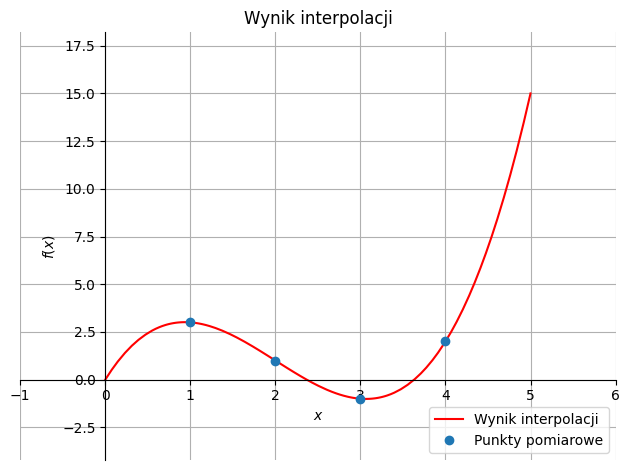

In [153]:
from sympy.plotting.plot import MatplotlibBackend, Plot

# funkcja zwracająca wykres z biblioteki sympy
# Używana z powodu konieczności połączenia wielu wykresów w jeden
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

p1 = sp.plot(wyn, (x, 0, 5),  show=False, line_color='red')
p1.title = 'Wynik interpolacji'
p1.margin = 0.2
fig, axe = get_sympy_subplots(p1)
# Dodatkowe wykresy-tu punkty interpolacji
axe.plot(xi, yi, "o")
axe.legend(['Wynik interpolacji', 'Punkty pomiarowe'], loc='lower right')
axe.grid()



## Testy poprawności działania funkcji

In [154]:
print(lagrange([[1,2], [3,4]], 4))

5.0


1.0*x + 1.0


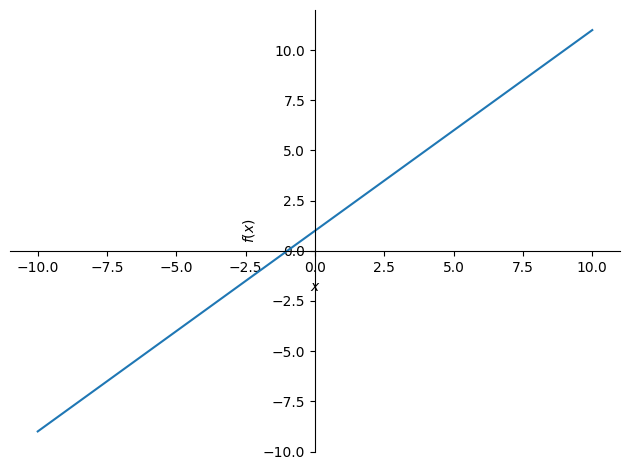

In [155]:
poly = lagrange_polynomial([[1,2], [3,4]])
print(poly)
sp.plot(poly)

## Ładowanie i wyświetlanie danych pobieranych z pliku tekstowego

Program może ładować dane z pliku tekstowego zapisanego w formie dwóch kolumn, które oddzielone są przecinkiem.
Każdy z wierszy kolumn reprezentuje punkt interpolacji.
Np.
1,2
1.5, 3
3,4
Plik należy umieścic w folderze z programem, np. korzystając z domyślnego narzędzia oferowanego przez Jupyter Lab

![Ładowanie danych z pliku](assets/8.png)

### Wczytywanie danych z pliku

In [156]:
nazwa_pliku = 'Interpolacja_dane.txt'

# Funkcja, która zastępuje przecinki jako separator dziesiętny na kropki - w celu poprawnego wczytania danych za
# pomocą np.loadtxt
def replace_commas_with_periods(filename):
    with open(filename, 'r') as file:
        contents = file.read()
        new_contents = contents.replace(',', '.')
    with open(filename, 'w') as file:
        file.write(new_contents)

replace_commas_with_periods(nazwa_pliku)
text_file_array = np.loadtxt('./' + nazwa_pliku, delimiter='\t')

### Wyświetlanie danych z pliku

Wartość w zadanym punkcie:  -567.7499999999999
Wzór funkcji wielomianu:  0.39*x**5 - 3.50000000000001*x**4 - 4.00000000000004*x**3 - 4.0*x**2 + 200.0*x + 1.0


(0.0, 10.0)

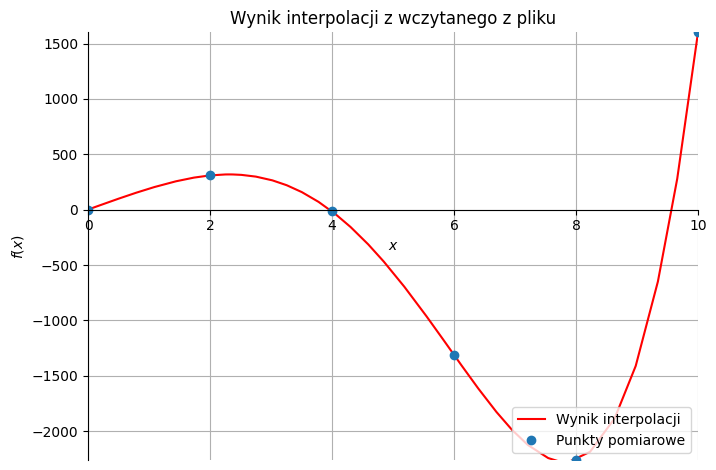

In [158]:
wartosc_w_zadanym_punkcie = lagrange(text_file_array, 5)
print('Wartość w zadanym punkcie: ',  wartosc_w_zadanym_punkcie)

funkcja_wielomianowa = lagrange_polynomial(text_file_array)
print('Wzór funkcji wielomianu: ', funkcja_wielomianowa)

p1 = sp.plot(lagrange_polynomial(text_file_array),  show=False, line_color='red')
p1.title = 'Wynik interpolacji z wczytanego z pliku'
p1.margin = 0.2
fig, axe = get_sympy_subplots(p1)
# Dodatkowe wykresy-tu punkty interpolacji
axe.plot(text_file_array.transpose()[0], text_file_array.transpose()[1], "o")
axe.legend(['Wynik interpolacji', 'Punkty pomiarowe'], loc='lower right')
axe.grid()
# Pokaż zakres odpowiedni do wczytanego pliku
axe.set_ylim(np.amin(text_file_array.transpose()[1]), np.amax(text_file_array.transpose()[1]))
axe.set_xlim(np.amin(text_file_array.transpose()[0]), np.amax(text_file_array.transpose()[0]))
#axe.set_xlim(0, 10)
#axe.set_ylim(-2300, 1700)